In [ ]:
# %% Includes
# ================================================

import numpy as np
import matplotlib.pyplot as plt


#Just the first Tone:

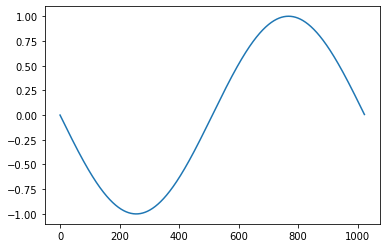

In [ ]:

M=1024

a_m=np.zeros(M,dtype=complex)   # complex fft parameters

a_m[1] = M*1j   #positive first sine

STFT_block=np.fft.ifft(a_m).real  # take real part 
plt.plot(STFT_block)


# Just the (Hann) Shape:

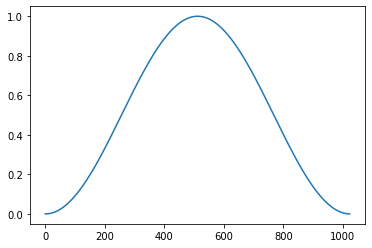

In [ ]:

M=1024

a_m=np.zeros(M,dtype=complex)   # complex fft parameters

a_m[0] = M/2
a_m[-1] = -M/4
a_m[1] = -M/4

STFT_block=np.fft.ifft(a_m).real  # take real part 
plt.plot(STFT_block)


Multiplication in time domain corresponds to convolution in freq. domain
# Convolved shape and tone in freq domain:

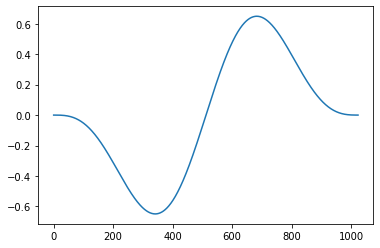

In [ ]:

M=1024

a_m=np.zeros(M,dtype=complex)   # complex fft parameters

a_m[1] = 1j*M/2
a_m[0] = -1j*M/4
a_m[2] = -1j*M/4

STFT_block=np.fft.ifft(a_m).real  # take real part 
plt.plot(STFT_block)

# With higher freq tone:

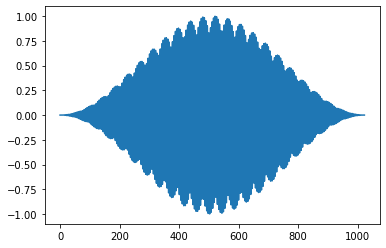

In [ ]:
M=1024

a_m=np.zeros(M,dtype=complex)   # complex fft parameters

a_m[200] = 1j*M/2
a_m[199] = -1j*M/4
a_m[201] = -1j*M/4

STFT_block=np.fft.ifft(a_m).real  # take real part 
plt.plot(STFT_block)

# Remarks:

* There is a correspondence between freq. and time resolution, essentially like Heisenberg's uncertainty principle.

* A signal limited in time (aka pulse) has an infinite spectrum. The higher freq components just get smaller and smaller the longer the pulse is. (and windowing can change the freq. distibution)

* In a digital representation (DFT/FFT) the spectrum and the time domain are essentially circles, aka periodic with one period beeing the number of samples/number of representable frequencies.

#Phase Space:


The phase space trajectory with tone amplitudes $a_m$ representing one tone AND the (Hann) shape

$	\alpha(t)=-i\frac{\Omega}{2}\sum_m\int_{0}^{t}a_m e^{-i\delta_m x}dx$

should be equivalent to

$	\alpha(t)=-i\frac{\Omega}{2}\int_{0}^{t}P(x) e^{-i\delta x}dx$

with $P(x)$ being the Hann window.








# Multiloop Gates
There should be a correspondence of the Multiloop parameters $K,\tau\delta$ and freq. representation of the (higher order) Hann shape:

multiloop gate multiplies both by $\sqrt{K}$

K=1: gatetime $\tau= 500\mu s$ det $\delta=2kHz$

K=2: gatetime $\tau= 707.1\mu s$ det $\delta=2.818 kHz$

K=3: gatetime $\tau= 866.02\mu s$ det $\delta=3.464 kHz$

# Question:

Can we engineer the STFT Parameters so that the conditions

$	\alpha(\tau)=0$  and $Im(\Phi(\tau))=-\frac{\pi}{8}$

are met while maintaining an overall shape that:

* Doesn't "kick" the ion into a superposition of some unwanted motional states (can I say it like this?)
* Is robust against detuning error [[Sussex](https://arxiv.org/pdf/1805.07351.pdf)]
* Is robust against premature pulse termination
* Maxwell permits the synthesis and amplification of (a hard turn-on will result in ringing and overshoot)


#Conclusion:

Many of the requirements are related or even equivalent. 

[[Farhang Haddadfarshi and Florian Mintert 2016 New J. Phys. 18 123007](https://spiral.imperial.ac.uk/bitstream/10044/1/42177/9/Haddadfarshi_2016_New_J._Phys._18_123007.pdf)] have optimized for some condition I don't understand but I think their pulse will also start and end at 0 and be "smooth" (essentially some weird window defined by the tone coefficients). 

One could also optimize for the pulse and its derivatives to be 0 at $t=0$ and $t=\tau$.